In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import graphing
from preprocessing import remove_columns, vincular_etiquetas

In [87]:
# Replace 'your_data.xlsx' with the actual path to your Excel file
file_path = 'SiniestrosAutomovil2022.xlsx'
template_file_path = 'SiniestrosAutomovil2022-edited.xlsx'

In [71]:
# Read the CSV file
df_original = pd.read_excel(file_path)

df_template = pd.read_excel(template_file_path)

In [72]:
# Remove columns that are not needed
df = remove_columns(df_original, df_template)
# df_cleaned.head()

In [74]:
# Columnas a vincular (código, etiqueta)
columnas_codigo_etiqueta = [
    ('Tipo Póliza', 'Nombre Tipo Póliza'),
    ('Contratante/Asegurado', 'Nombre Contratante/Asegurado'),
    ('Ciudad', 'Nombre Ciudad'),
    ('Departamento', 'Nombre Departamento'),
    ('Agente Principal', 'Nombre Agente Principal'),
    ('Referencia', 'Nombre Referencia'),
    ('Organizador Principal', 'Nombre Organizador Principal'),
    ('Organizador', 'Nombre Organizador'),
    ('Cobrador', 'Nombre Cobrador'),
    ('Código Tipo Vehiculo', 'Tipo Vehiculo'),
    ('Código Marca', 'Marca'),
    ('Código Modelo', 'Modelo'),
    ('Código Destino Uso', 'Destino Uso'),
    ('Código Area de Circulación', 'Area de Circulación'),
    ('Código Color', 'Color'),
    ('Código Via Importación', 'Via Importación'),
    ('Código Procedencia', 'Procedencia')
]

# Llamar a la función para agregar las columnas de etiquetas
df = vincular_etiquetas(df, columnas_codigo_etiqueta)

In [75]:
# Extraer la segunda parte de cada tupla como lista de etiquetas
etiquetas = [etiqueta for _, etiqueta in columnas_codigo_etiqueta]

# Mostrar la lista de etiquetas
print(etiquetas)

['Nombre Tipo Póliza', 'Nombre Contratante/Asegurado', 'Nombre Ciudad', 'Nombre Departamento', 'Nombre Agente Principal', 'Nombre Referencia', 'Nombre Organizador Principal', 'Nombre Organizador', 'Nombre Cobrador', 'Tipo Vehiculo', 'Marca', 'Modelo', 'Destino Uso', 'Area de Circulación', 'Color', 'Via Importación', 'Procedencia']


In [76]:
# Eliminar las columnas de códigos originales del DataFrame modificado
df = df.drop(etiquetas, axis=1)

In [77]:
# List of columns to convert
columns_to_convert = ['Suma Asegurada Art.', 'Prima Técnica Art.', 'Costo de Servicio Art.', 'Prima Art.', 'Premio Art.',
                       'Suma Asegurada', 'Prima Técnica', 'Costo de Servicio', 'Prima']

# Convert negative values to positives
df[columns_to_convert] = df[columns_to_convert].abs()

In [95]:
# Agregar la columna de siniestro
siniestros_df = agregar_columna_condicional(df)

# Eliminar filas sin sinestro
siniestros_df = eliminar_filas_condicionales(siniestros_df)

NameError: name 'agregar_columna_condicional' is not defined

In [ ]:

df = df.drop(['F/Nacimiento','F/Emisión','Fec. Desde','Fec. Hasta'], axis=1)

In [ ]:
# Mostrar el DataFrame resultante
print(df)

       Tipo Póliza  Contratante/Asegurado              Tipo Persona  \
0                3             2184500000            Persona Física   
1                1              267920000  Persona Jurídica Privada   
2                1             2206650000  Persona Jurídica Privada   
3                2             1460830000  Persona Jurídica Privada   
4                2             2121020000  Persona Jurídica Privada   
...            ...                    ...                       ...   
10061            1             2313790000            Persona Física   
10062            2             2193990000            Persona Física   
10063            1             1936430000            Persona Física   
10064            1               64990000            Persona Física   
10065            1              282010000  Persona Jurídica Privada   

           Ciudad  Departamento  Moneda  Cant. Artículos  Producto  \
0      1081001000    1081000000       1                1       NaN   
1      

In [ ]:
# Mostrar el dataframe de siniestros
siniestros_df = siniestros_df.drop(['F/Nacimiento','F/Emisión','Fec. Desde','Fec. Hasta'], axis=1)
print(siniestros_df)

       Tipo Póliza  Contratante/Asegurado              Tipo Persona  \
8                1             1027130000            Persona Física   
11               2             1949910000  Persona Jurídica Privada   
198              5               58500000            Persona Física   
524              2              325160000  Persona Jurídica Privada   
537              1             1720710000            Persona Física   
...            ...                    ...                       ...   
10047            1             1024390000            Persona Física   
10048            2             2023500000  Persona Jurídica Privada   
10051            1             1506930000            Persona Física   
10058            2             1166690000            Persona Física   
10065            1              282010000  Persona Jurídica Privada   

           Ciudad  Departamento  Moneda  Cant. Artículos  Producto  \
8      1007044000    1007000000       1                2       NaN   
11     

In [ ]:
calcular_porcentaje_autos_asegurados_por_marca(siniestros_df)

,Código Marca,Porcentaje de Autos Asegurados
0,1000000,36.270492
1,4000000,11.036300
2,21000000,10.128806
3,5000000,7.055035
4,28000000,5.386417
...,...,...
71,113000000,0.029274
72,1247000000,0.029274
73,1157000000,0.029274
74,1012000000,0.029274


Distribution of Policy Holders by City

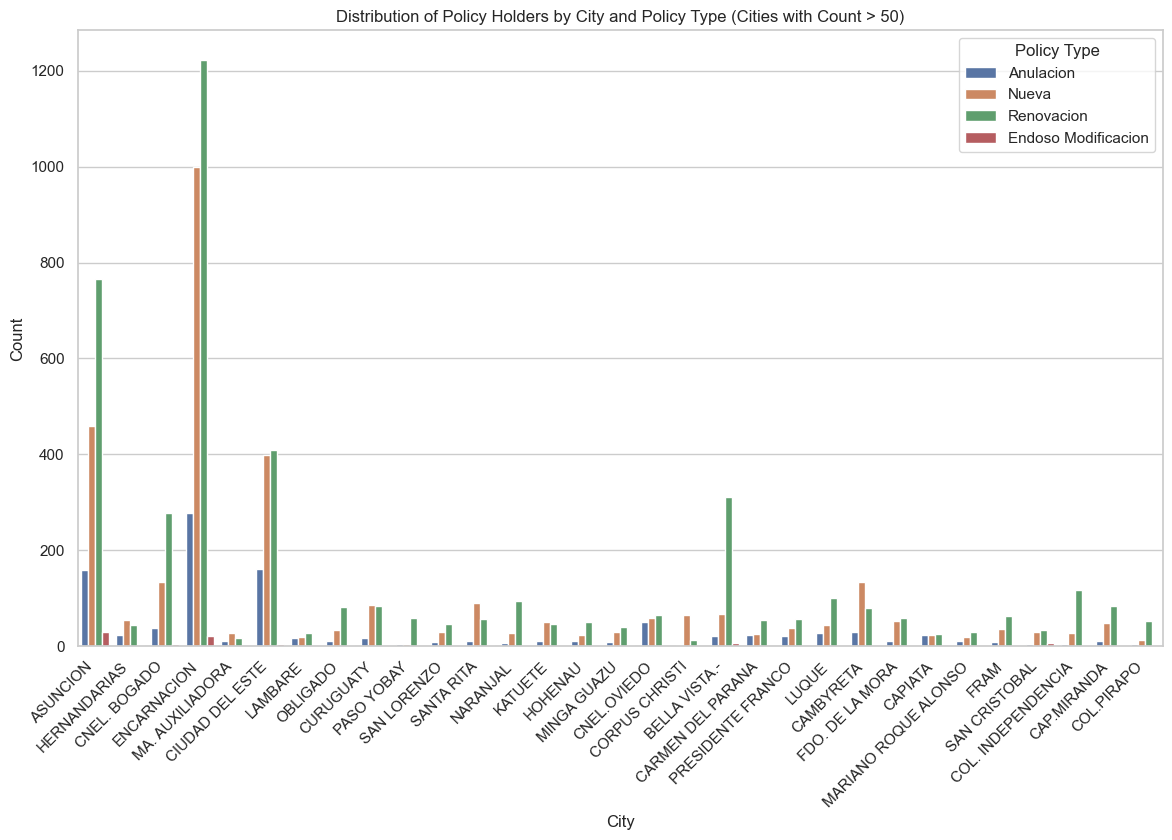

In [ ]:
# Filter the DataFrame to include only cities with a count greater than 50
relevant_cities = df['Ciudad_etiqueta'].value_counts()[df['Ciudad_etiqueta'].value_counts() > 50].index

# Filter the DataFrame
df_relevant_cities = df[df['Ciudad_etiqueta'].isin(relevant_cities)]

# Plotting the distribution of policy holders by city and policy type for relevant cities
plt.figure(figsize=(14, 8))
sns.countplot(x='Ciudad_etiqueta', data=df_relevant_cities, hue='Tipo Póliza_etiqueta')
plt.title('Distribution of Policy Holders by City and Policy Type (Cities with Count > 50)')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Policy Type')
plt.show()

Correlation Heatmap

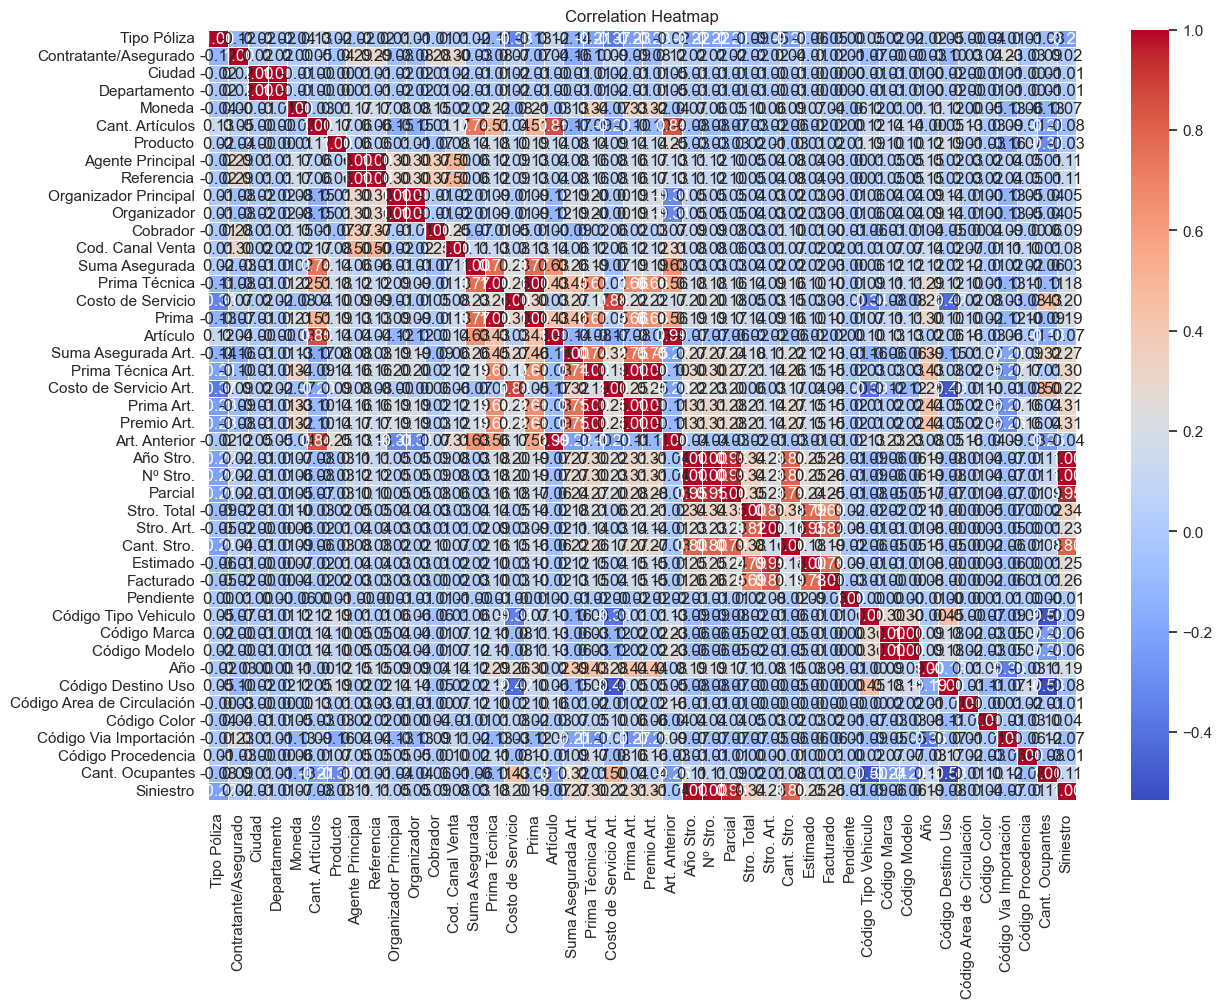

In [ ]:
# Selecting only numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Analyzing the correlation between numerical columns
correlation_matrix = df[numerical_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [94]:
claim_severity_analysis_histogram(df)

NameError: name 'claim_severity_analysis_histogram' is not defined